### **1. Analyze the dataset and create graphs using seaborn and matplotlib.Dataset:**

**Import Necessary Libraries:**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('/content/dataset - netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


**Trend of Shows Over Years:**

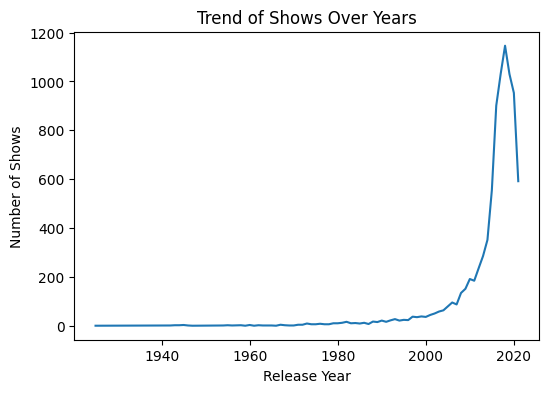

In [3]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=df.groupby('release_year').size())
plt.title('Trend of Shows Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.show()

**Count of Shows Added Over Time:**

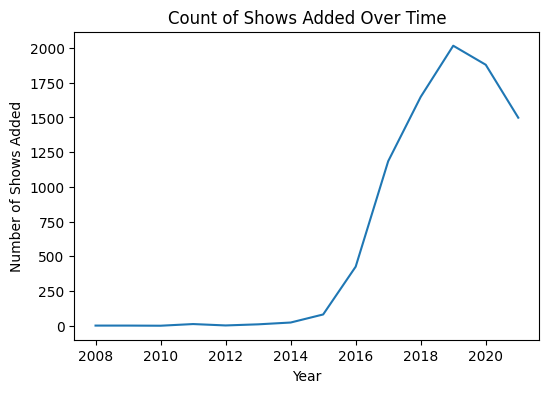

In [4]:
df['date_added'] = pd.to_datetime(df['date_added'])
plt.figure(figsize=(6, 4))
sns.lineplot(data=df.groupby(df['date_added'].dt.year).size())
plt.title('Count of Shows Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Shows Added')
plt.show()

**Count of Shows by Country:**

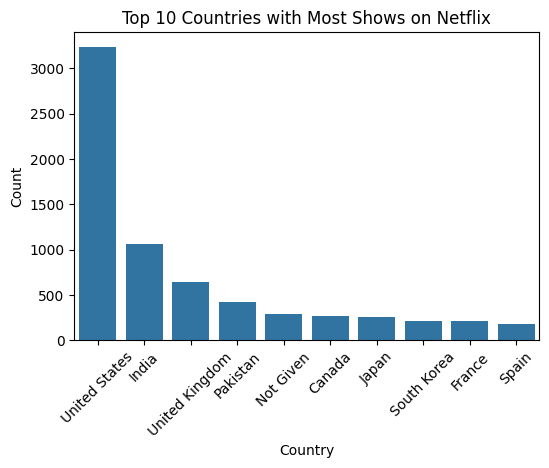

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Top 10 Countries with Most Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

**Distribution of Ratings:**

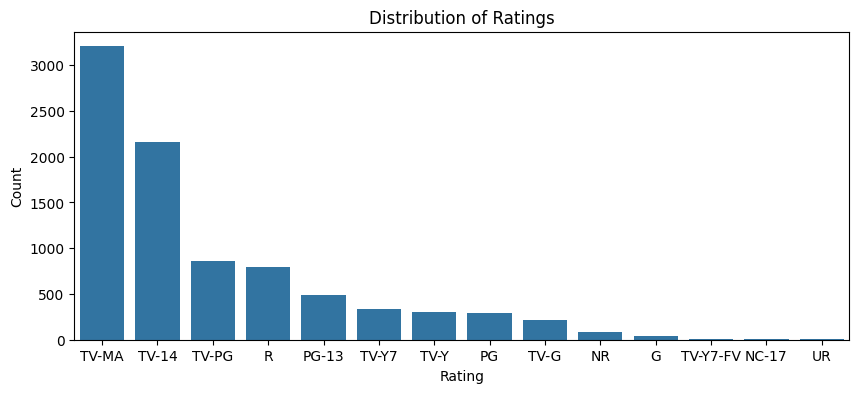

In [6]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Types of Shows:**

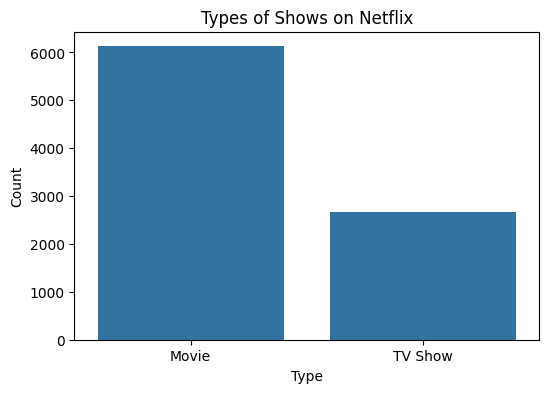

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type')
plt.title('Types of Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

**Top Directors with Most Shows:**

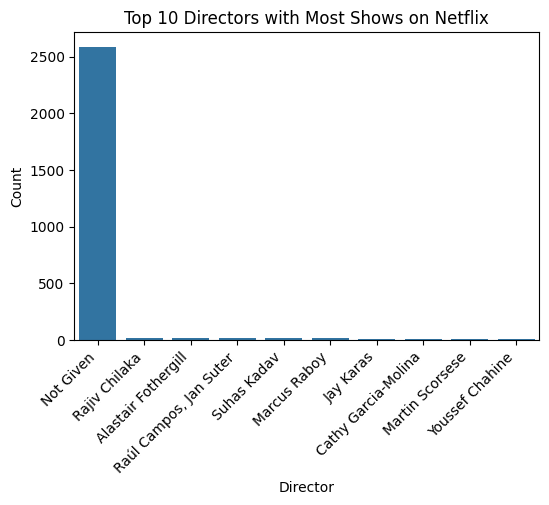

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='director', order=df['director'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Top 10 Directors with Most Shows on Netflix')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45, ha = 'right')
plt.show()

**Most Common Genres:**

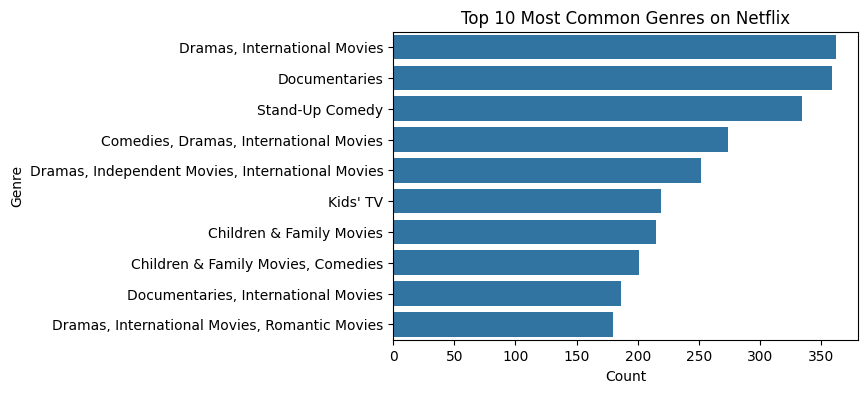

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='listed_in', order=df['listed_in'].value_counts().index[:10])
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Rating Distribution by Type:**

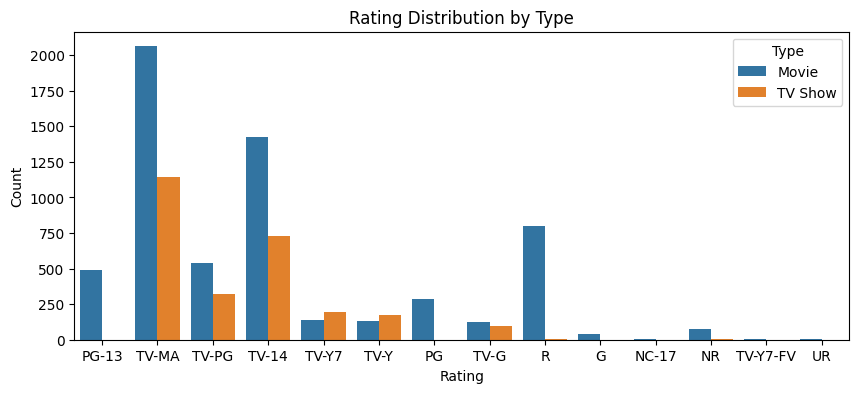

In [10]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='rating', hue='type')
plt.title('Rating Distribution by Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

**Release Year Distribution:**

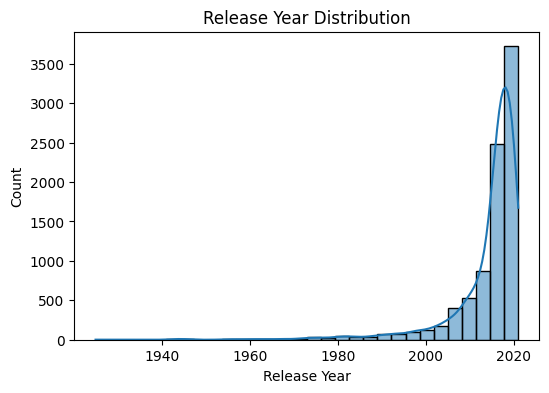

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='release_year', bins=30, kde=True)
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

**Duration Distribution:**

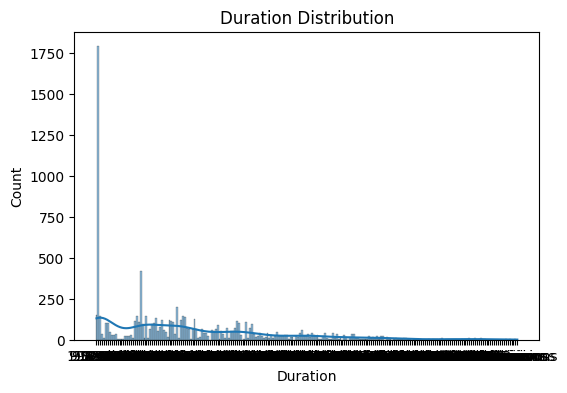

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='duration', bins=30, kde=True)
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

**Duration Distribution by Type:**

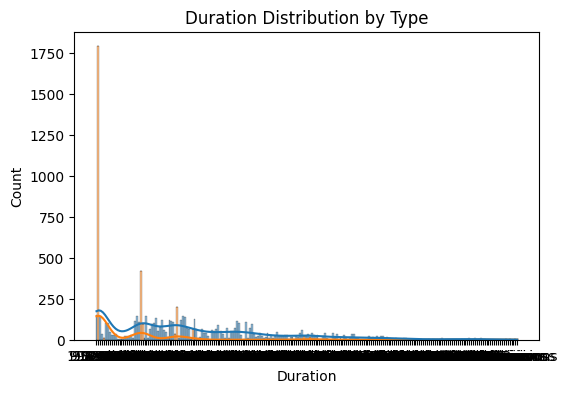

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='duration', bins=30, kde=True, hue='type', multiple='stack', legend=False)
plt.title('Duration Distribution by Type')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

**Release Year vs. Rating:**

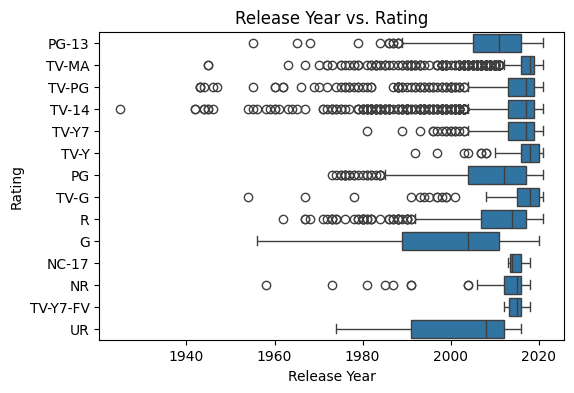

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='release_year', y='rating')
plt.title('Release Year vs. Rating')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.show()

### **2. Train a simple linear regressing model on a dataset and predict the output:**

**Import Necessary Libraries:**

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [16]:
train_df = pd.read_csv('/content/train dataset - train.csv')
test_df = pd.read_csv('/content/test dataset - test.csv')

In [17]:
print(train_df.head())

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984


In [18]:
print(test_df.head())

    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


**Inspect the dataset:**

In [19]:
print("\033[1mTrain datset:\033[0m")
train_df.dtypes

Train datset:


x    float64
y    float64
dtype: object

In [20]:
print("\033[1mTest datset:\033[0m")
test_df.dtypes

Test datset:


x      int64
y    float64
dtype: object

In [21]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

x    0
y    1
dtype: int64
x    0
y    0
dtype: int64


In [22]:
# Fill null values in the dataset with the mean of the respective columns
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)

**Split the Train and Test Datasets into Features (X) and Target (y):**

In [23]:
X_train = train_df[['x']]  # Features in the training dataset
y_train = train_df['y']    # Target in the training dataset

X_test = test_df[['x']]   # Features in the test dataset
y_test = test_df['y']     # Target in the test dataset

**Train the Linear Regression Model:**

In [24]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

**Make Predictions on the Test Set:**

In [25]:
# Predict the output for the test set
y_pred = model.predict(X_test)

**Evaluate the Model:**

In [26]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 770.3012816202481


**Visualize the Regression Line:**

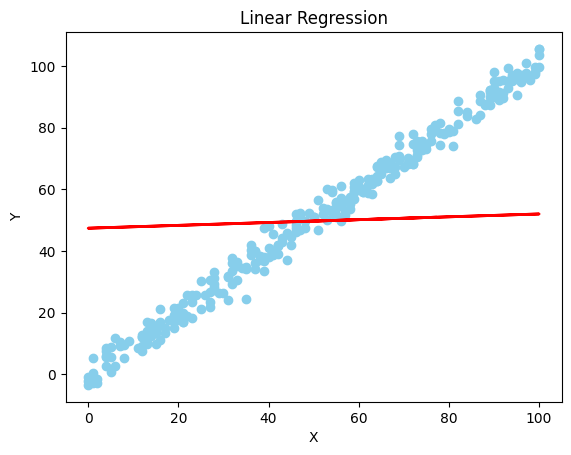

In [27]:
plt.scatter(X_test, y_test, color='skyblue')  # Scatter plot of the test data
plt.plot(X_test, y_pred, color='red', linewidth=2)  # Regression line
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()